<a href="https://colab.research.google.com/github/saivivekv95/Data_Science_Practice/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
## Divide the dataset into Independant & Dependant features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
###Feature Engine
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [29]:
###COncatenate these variable with dataframe

X=X.drop(['Geography','Gender'],axis=1)

In [30]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58


In [33]:
X=pd.concat([X,geography,gender],axis=1)

In [35]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [36]:
####Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [37]:
###Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [39]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [40]:
X_train.shape

(8000, 11)

In [42]:
#### Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [43]:
###Initialize the ANN
classifier = Sequential()

In [44]:
###Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [45]:
###adding the first hidden layer
classifier.add(Dense(units = 7,activation='relu'))

In [46]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [47]:
###Adding the ouput layer
classifier.add(Dense(1,activation='sigmoid'))

In [51]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [55]:
####Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [56]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3194 - accuracy: 0.8662 - val_loss: 0.3742 - val_accuracy: 0.8451
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3177 - accuracy: 0.8666 - val_loss: 0.3826 - val_accuracy: 0.8493
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3157 - accuracy: 0.8677 - val_loss: 0.3943 - val_accuracy: 0.8474
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8699 - val_loss: 0.3751 - val_accuracy: 0.8459
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3156 - accuracy: 0.8664 - val_loss: 0.4079 - val_accuracy: 0.8478
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3191 - accuracy: 0.8694 - val_loss: 0.3766 - val_accuracy: 0.8493
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3187 - accuracy: 0.8686 - val_loss: 0.3858 - val_accuracy:

In [57]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

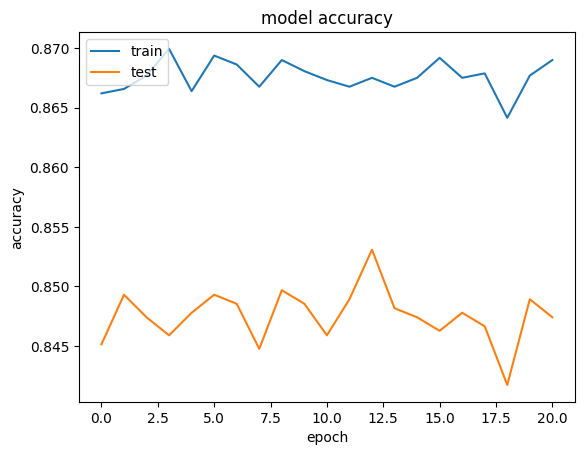

In [60]:
###summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [61]:
###Predicting

y_pred=classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [62]:
###confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 226,  179]])

In [63]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [65]:
score*100

86.3

In [66]:
#### get the weights
classifier.get_weights()

[array([[-0.8761202 , -0.44966218, -0.13197333,  0.10284308,  1.802778  ,
         -0.22707772, -0.28840673,  0.7571752 , -0.31202027, -0.62565935,
         -0.5715329 ],
        [ 0.36970025, -0.14673336,  3.0410125 ,  2.8376057 , -1.5578594 ,
          0.44062433,  0.7730926 , -2.0583613 ,  2.814492  , -4.811733  ,
         -3.9220576 ],
        [ 0.42924592, -0.06682126, -0.5215876 , -1.9251783 ,  0.38008776,
          2.1764252 ,  0.32462797,  1.2494614 ,  0.16083764, -1.6728975 ,
         -0.17756368],
        [-3.9594288 ,  0.12779324, -1.3548088 ,  2.0841148 , -2.9033945 ,
         -2.1131916 ,  0.92678934,  0.24984786, -2.854376  ,  2.694457  ,
         -0.8890492 ],
        [-4.4538765 ,  3.1485837 , -0.98942   ,  0.01757797, -1.7425704 ,
          0.6139177 ,  4.5139794 , -0.68877316,  0.54061204,  0.59760886,
          0.30998155],
        [ 0.19678032,  1.8545692 , -0.4729817 , -0.23012033,  0.10551193,
         -0.24017008, -0.09202152,  1.0099441 , -0.37747166,  0.0130021